# Breast Cancer Data

Using the MIMIC II dataset, identify the age distribution of breast cancer patients and the 10 most frequent different associated diagnoses with these patients

In [1]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import date

In [2]:
#read in patient data from csv file
patients = pd.read_csv('input/PATIENTS.csv', delimiter = ",")
patients[['SUBJECT_ID', 'GENDER', 'DOB']].head()

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13 00:00:00
1,250,F,2164-12-27 00:00:00
2,251,M,2090-03-15 00:00:00
3,252,M,2078-03-06 00:00:00
4,253,F,2089-11-26 00:00:00


In [3]:
#read in diagnoses data from csv file
diagnoses = pd.read_csv('input/DIAGNOSES_ICD.csv', delimiter = ",")
diagnoses.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [4]:
#read in admission data from csv file
admission = pd.read_csv('input/ADMISSIONS.csv', delimiter = ",")
admission[['SUBJECT_ID', 'ADMITTIME']].head()

,SUBJECT_ID,ADMITTIME
0,22,2196-04-09 12:26:00
1,23,2153-09-03 07:15:00
2,23,2157-10-18 19:34:00
3,24,2139-06-06 16:14:00
4,25,2160-11-02 02:06:00


In [5]:
#show diagnoses data with only subject ID and ICD9 code
diagnoses[['SUBJECT_ID', 'ICD9_CODE']].head()

,SUBJECT_ID,ICD9_CODE
0,109,40301
1,109,486
2,109,58281
3,109,5855
4,109,4254


In [6]:
#merge patient data with admission data
pat_adm = patients.merge(admission, left_on = 'SUBJECT_ID', right_on = 'SUBJECT_ID')
pat_adm[['SUBJECT_ID', 'DOB', 'ADMITTIME']].head()

,SUBJECT_ID,DOB,ADMITTIME
0,249,2075-03-13 00:00:00,2149-12-17 20:41:00
1,249,2075-03-13 00:00:00,2155-02-03 20:16:00
2,249,2075-03-13 00:00:00,2156-04-27 15:33:00
3,250,2164-12-27 00:00:00,2188-11-12 09:22:00
4,251,2090-03-15 00:00:00,2110-07-27 06:46:00


In [7]:
#merge diagnoses data with pat_adm table
f_table = pat_adm.merge(diagnoses, left_on = 'SUBJECT_ID', right_on = 'SUBJECT_ID')
data = f_table[['SUBJECT_ID', 'GENDER', 'DOB', 'ADMITTIME', 'ICD9_CODE']]
data.head()

,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE
0,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,49322
1,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,51882
2,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,41071
3,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,42841
4,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,99812


In [8]:
#only show rows with ICD9 code 1749
data1 = data[data.ICD9_CODE == '1749']
data1.sample(5)

,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE
544884,20659,F,2108-02-05 00:00:00,2144-03-02 15:40:00,1749
109808,2984,F,2127-09-02 00:00:00,2187-03-05 00:20:00,1749
1098311,64371,F,2107-05-31 00:00:00,2160-03-22 08:48:00,1749
1165390,99268,F,2058-09-30 00:00:00,2119-12-02 19:40:00,1749
624937,22727,F,2104-03-05 00:00:00,2183-05-15 19:19:00,1749


In [9]:
#show rows with ICD9 code 19881
data2 = data[data.ICD9_CODE == '19881']
data2

,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE
80997,2074,F,2116-05-19 00:00:00,2173-03-14 23:31:00,19881
525150,19681,F,2076-04-12 00:00:00,2114-02-26 09:34:00,19881
554362,19280,F,2127-08-06 00:00:00,2170-04-24 12:53:00,19881
741606,59311,F,2102-08-16 00:00:00,2136-07-15 17:29:00,19881
741620,59311,F,2102-08-16 00:00:00,2136-10-13 00:40:00,19881
1117102,84495,F,2066-12-08 00:00:00,2136-01-20 10:52:00,19881
1242810,84105,F,2072-10-16 00:00:00,2145-08-04 12:39:00,19881
1280251,69172,F,2073-03-25 00:00:00,2141-01-02 08:25:00,19881
1344138,80962,F,2082-05-21 00:00:00,2156-03-15 23:03:00,19881


In [10]:
#combine data1 and data2 into the same dataframe to hold patients from both ICD9 codes
data3 = data1.append(data2, ignore_index = True)
data3.head()

,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE
0,3419,F,2130-05-25 00:00:00,2200-08-22 14:32:00,1749
1,2984,F,2127-09-02 00:00:00,2183-07-12 23:00:00,1749
2,2984,F,2127-09-02 00:00:00,2186-12-24 16:01:00,1749
3,2984,F,2127-09-02 00:00:00,2187-03-05 00:20:00,1749
4,2984,F,2127-09-02 00:00:00,2187-04-30 17:29:00,1749


In [11]:
#remove time from DOB and admit time, keeping only date
data3['DOB'] = pd.to_datetime(data3['DOB']).dt.date
data3['ADMITTIME'] = pd.to_datetime(data3['ADMITTIME']).dt.date
data3.sample(5)

,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE
91,59311,F,2102-08-16,2136-07-15,19881
81,76782,F,2035-01-17,2104-06-09,1749
59,72233,F,2056-09-04,2120-12-12,1749
47,46851,F,2035-12-17,2106-09-02,1749
11,18182,F,2083-09-08,2135-05-02,1749


In [12]:
#calculate age from DOB and admittime
data3['AGE'] = (np.floor((pd.to_datetime(data3['ADMITTIME']) - pd.to_datetime(data3['DOB'])).dt.days / 365.25)).astype(int)
data3.sample(5)

,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE,AGE
78,95868,F,2133-04-22,2197-12-04,1749,64
6,23224,F,2092-11-28,2147-11-17,1749,54
17,30412,F,2043-10-18,2129-10-01,1749,85
73,95406,F,2070-03-18,2129-07-12,1749,59
42,26401,F,2086-10-17,2144-12-27,1749,58


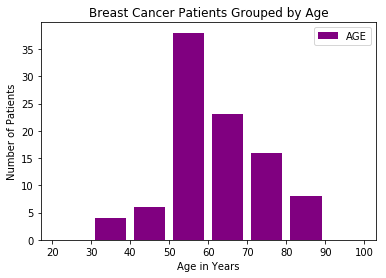

In [13]:
#bar graph showing ages of breast cancer patients
data3[['AGE']].plot(kind = 'hist', bins = [20,30,40,50,60,70,80,90,100], rwidth = 0.8, color = "purple", title = "Breast Cancer Patients Grouped by Age")
plt.ylabel('Number of Patients')
plt.xlabel('Age in Years')
plt.show()


In [14]:
#merge subject ID and ICD9 codes for all diagnoses of breast cancer patients
df = pd.merge(data3[['SUBJECT_ID']], diagnoses[['SUBJECT_ID', 'ICD9_CODE']], on='SUBJECT_ID')
df = df[df.ICD9_CODE != '1749'] #drop 1749 from table
print (df.head())

   SUBJECT_ID ICD9_CODE
0        3419      1983
1        3419      1985
2        3419     19889
4        3419     V4571
5        3419      4019


In [15]:
#group ICD9 codes together and sort from max -> min
new_df = df.groupby('ICD9_CODE').size().sort_values(ascending=False).head(10)
new_df.columns = ['ICD9_CODE', 'COUNT']
print (new_df)

ICD9_CODE
4019     83
1985     49
4280     48
53081    43
5990     41
V103     39
1983     38
2724     38
1977     36
486      35
dtype: int64


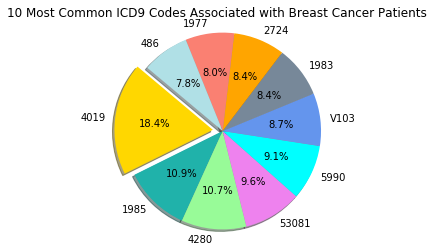

In [16]:
#create pie chart for top 10 associated ICD9 codes w/ breast cancer patients
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
colors = ['gold', 'lightseagreen', 'palegreen', 'violet', 'cyan', 'cornflowerblue', 'lightslategray', 'orange', 'salmon', 'powderblue']
plt.pie(new_df, labels = new_df.index, colors = colors, shadow = True, autopct = '%1.1f%%', startangle = 140, explode = explode)
plt.axis('equal')
plt.title("10 Most Common ICD9 Codes Associated with Breast Cancer Patients")
plt.show()